In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import numpy as np


In [4]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\SSW_Data_Encoded.csv')

df1.head()

,Gender_Diverse,Gender_Female,Gender_Male,Gender_Prefer not to say,Location_Preferences_Local Only,Location_Preferences_Local or Remote,Location_Preferences_Remote Only,Longitude,Latitude,Age,...,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Sum_Skills_Off_ab_avg,Activity_Status
0,0,1,0,0,0,1,0,13.581876,52.376172,25,...,1,2,5,5,2,5,1,2,0,2
1,0,0,1,0,0,0,1,13.648641,52.644114,25,...,4,2,2,5,2,1,4,3,1,0
2,0,1,0,0,0,1,0,13.125491,52.531250,21,...,0,0,0,4,3,4,1,3,0,2
3,0,1,0,0,0,1,0,13.199572,52.450986,28,...,0,0,0,4,4,5,3,5,0,1
4,0,0,1,0,0,1,0,13.277228,52.599578,31,...,3,1,1,3,5,3,1,3,1,3


In [5]:
features_list = df1.columns.tolist()

for feature in features_list:
    print(feature)

Gender_Diverse
Gender_Female
Gender_Male
Gender_Prefer not to say
Location_Preferences_Local Only
Location_Preferences_Local or Remote
Location_Preferences_Remote Only
Longitude
Latitude
Age
Count_Farming_off
Count_Fishery_off
Count_Gardening_off
Count_Pet_grooming_off
Count_Pet_training_off
Count_Drawing_off
Count_Painting_off
Count_Sculpture_off
Count_Print_making_off
Count_Poetry_off
Count_Make_up_off
Count_Facials_off
Count_Pedicure_and_Manicure_off
Count_Hair_care_off
Count_Ballet_off
Count_Tap_dance_off
Count_Jazz_dance_off
Count_Salsa_off
Count_Ballroom_dance_off
Count_Piano_off
Count_Guitar_off
Count_Drumming_off
Count_Trumpet_off
Count_Composing_off
Count_Script_writing_off
Count_Play_writing_off
Count_Poetry_writing_off
Count_Caligraphy_off
Count_Blogging_off
Count_Journalism_off
Count_German_off
Count_Spanish_off
Count_Arabic_off
Count_French_off
Count_English_off
Count_Nutrition_off
Count_Fitness_and_Excercise_off
Count_Wellness_off
Count_Tennis_off
Count_Football_off
Count

In [6]:
selected_features = [
    'Last_Seen',
    'Response_Time',
    'Sum_Skills_Off_ab_avg',
    'Activity_Status'
]

df2 = df1[selected_features]
df2.head()

,Last_Seen,Response_Time,Sum_Skills_Off_ab_avg,Activity_Status
0,5,2,0,2
1,2,0,1,0
2,2,3,0,2
3,2,1,0,1
4,2,2,1,3


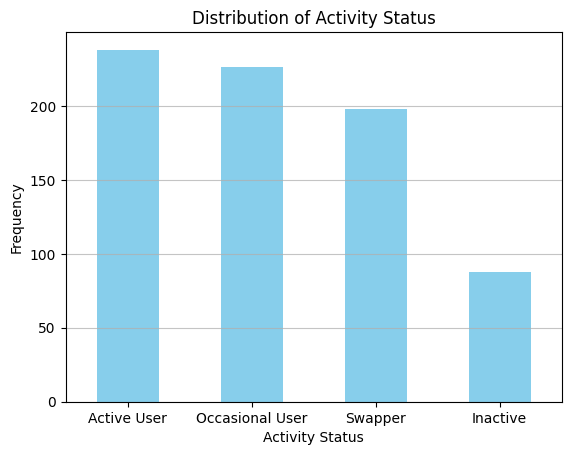

In [7]:
status_mappings = {
    3: 'Swapper',
    2: 'Active User',
    1: 'Occasional User',
    0: 'Inactive'
}

df3 = pd.DataFrame({'Mapped_Activity_Status': df2['Activity_Status'].map(status_mappings)})

df3['Mapped_Activity_Status'].value_counts().plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Activity Status')
plt.ylabel('Frequency')
plt.title('Distribution of Activity Status')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [8]:
features_list2 = df2.columns.tolist()

for feature in features_list2:
    print(feature)

Last_Seen
Response_Time
Sum_Skills_Off_ab_avg
Activity_Status


In [9]:
# Split the DataFrame into input variables (features) and output variables
X = df2.iloc[:, :-1]  
y = df2.iloc[:, -1:]  

In [10]:
print(X.shape)
print(y.shape)

(750, 3)
(750, 1)


# Build Classifier

In [11]:
clf = DecisionTreeClassifier()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
predictions = clf.predict(X_test)
predictions

array([1, 3, 3, 0, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 1, 2, 1, 0, 2, 3, 3, 3, 1, 3, 2, 2, 2, 3, 3,
       2, 1, 1, 3, 2, 1, 0, 3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3, 3, 2, 2,
       0, 3, 2, 3, 3, 1, 1, 2, 3, 0, 0, 0, 3, 2, 3, 2, 2, 1, 0, 2, 3, 2,
       1, 3, 3, 1, 1, 0, 3, 1, 3, 3, 2, 2, 2, 1, 1, 1, 3, 1, 3, 1, 2, 2,
       1, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 2, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1,
       1, 0, 3, 1, 2, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 3, 0, 1, 1, 1, 3,
       3, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 3, 2, 0, 0, 2, 1, 1,
       1, 3, 1, 1, 3, 0, 2, 3, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 3, 2, 3, 0, 2, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 2, 3, 0, 3], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1,2,3])

array([[30,  0,  0,  0],
       [ 0, 67,  0,  0],
       [ 0,  0, 87,  0],
       [ 0,  0,  0, 64]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)

array([1., 1., 1., 1.])

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1., 1., 1., 1.])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Inactive', 'Occasional User', 'Active User', 'Swapper']))

                 precision    recall  f1-score   support

       Inactive       1.00      1.00      1.00        30
Occasional User       1.00      1.00      1.00        67
    Active User       1.00      1.00      1.00        87
        Swapper       1.00      1.00      1.00        64

       accuracy                           1.00       248
      macro avg       1.00      1.00      1.00       248
   weighted avg       1.00      1.00      1.00       248



In [20]:
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Response_Time,0.433602
Last_Seen,0.344411
Sum_Skills_Off_ab_avg,0.221988


<Axes: >

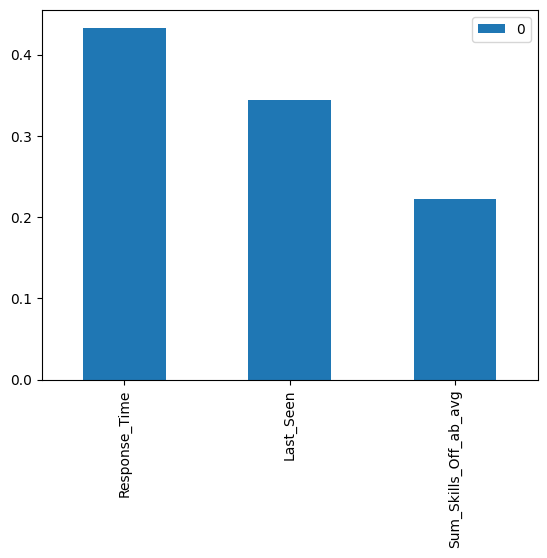

In [21]:
feature_importance.plot(kind='bar')

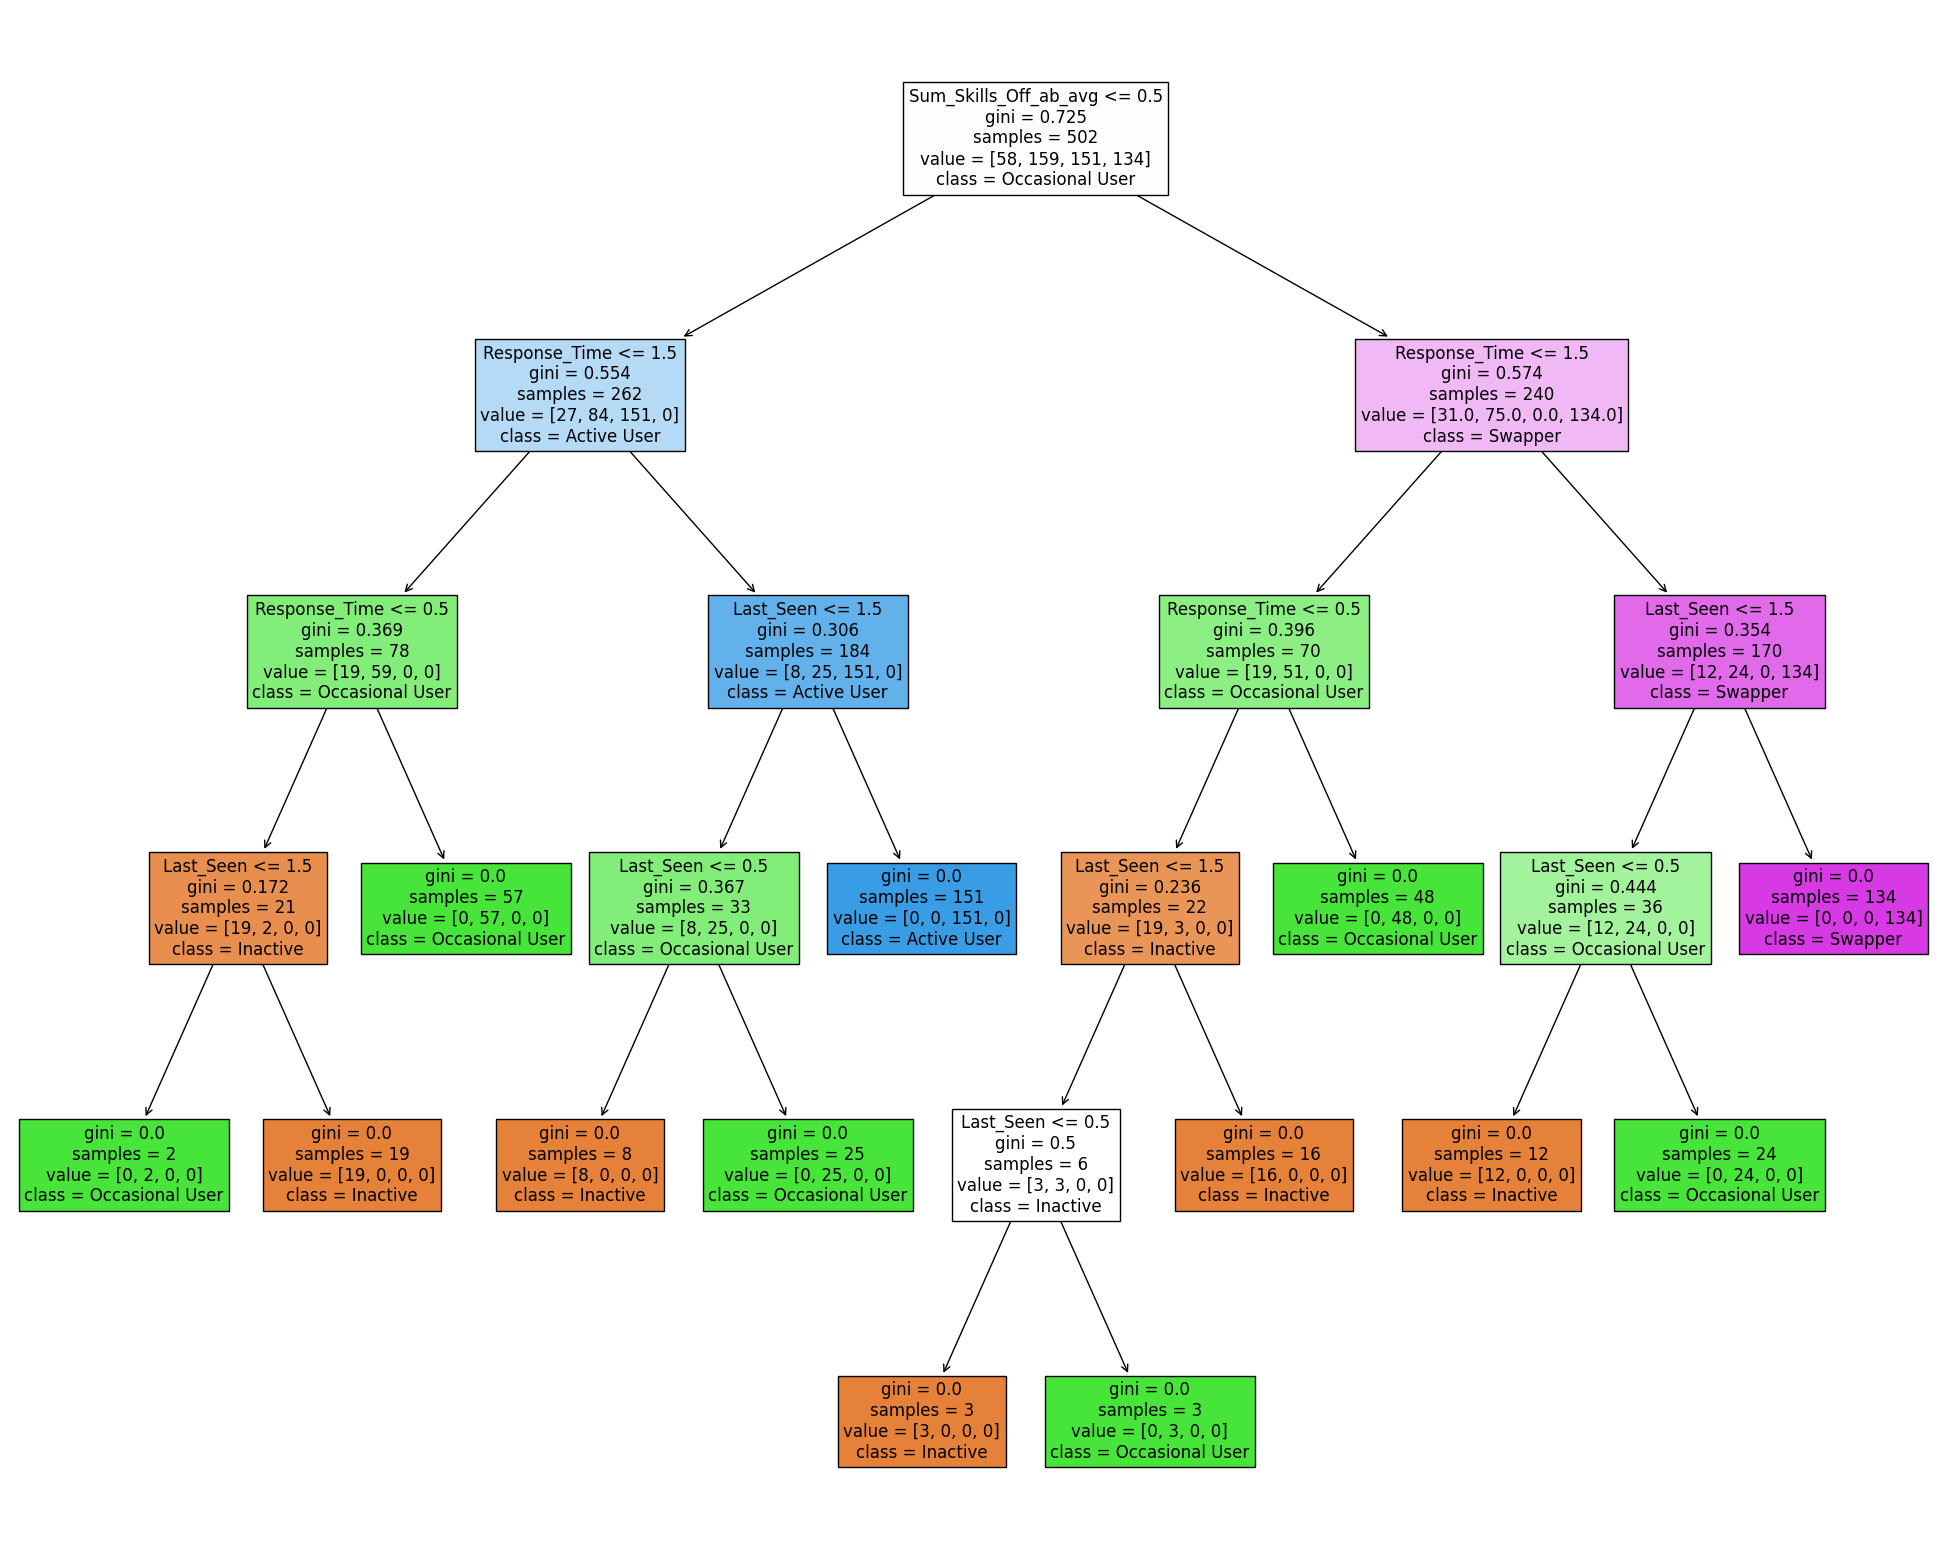

In [22]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Inactive', 1:'Occasional User', 2: 'Active User', 3: 'Swapper'},
                   filled=True,
                  fontsize=12)